In [3]:
# --- Import thư viện ---
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import numpy as np
# --- Load dữ liệu edges/nodes đã xuất từ Phần 2 ---
edges = pd.read_csv('data/edges.csv')
nodes = pd.read_csv('data/nodes.csv')


In [4]:
# --- Tạo graph directed ---
G = nx.DiGraph()
G.add_nodes_from(nodes['id'])
for _, row in edges.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['weight'])

# --- Largest weakly connected component, chuyển sang undirected ---
largest_cc = max(nx.weakly_connected_components(G), key=len)
G_largest = G.subgraph(largest_cc).to_undirected()

In [ ]:
# -----------------------------
# 1. TÍNH CENTRALITY
# -----------------------------
print("=== Tính centrality ===")

# Degree centrality (cả in/out cho graph directed)
degree_centrality_in = nx.in_degree_centrality(G)
degree_centrality_out = nx.out_degree_centrality(G)

# Closeness centrality (directed)
closeness_centrality = nx.closeness_centrality(G)

# Betweenness centrality (directed)
betweenness_centrality = nx.betweenness_centrality(G)

# Eigenvector centrality (undirected)
try:
    eigenvector_centrality = nx.eigenvector_centrality(G_largest, max_iter=500)
except nx.PowerIterationFailedConvergence:
    print("Eigenvector centrality chưa hội tụ, sử dụng subgraph nhỏ hơn")
    eigenvector_centrality = {}

# Tạo DataFrame tổng hợp
centrality_df = pd.DataFrame({
    'node': list(G.nodes()),
    'deg_in': [degree_centrality_in.get(n,0) for n in G.nodes()],
    'deg_out': [degree_centrality_out.get(n,0) for n in G.nodes()],
    'closeness': [closeness_centrality.get(n,0) for n in G.nodes()],
    'betweenness': [betweenness_centrality.get(n,0) for n in G.nodes()],
    'eigenvector': [eigenvector_centrality.get(n,0) for n in G.nodes()]
})





=== Tính centrality ===

Top 10 node theo in-degree:
                       node    deg_in   deg_out  closeness   betweenness  \
0                       NaN  0.002869  0.001913   0.002934  8.468080e-06   
585       @NghiaChinh-gy6pc  0.000797  0.000080   0.000797  6.352648e-08   
2908   @MinhHoangTran-xk2tr  0.000797  0.000000   0.000797  0.000000e+00   
1820     @groupausencon1930  0.000797  0.000080   0.002352  3.430430e-07   
2952       @Diepnhikhucvlog  0.000717  0.000080   0.000717  5.717384e-08   
6241       @Nhatkysinhtontv  0.000638  0.000797   0.000646  2.229780e-06   
4220            @ongtan6354  0.000558  0.000080   0.000558  4.446854e-08   
346              @HuyLeo203  0.000478  0.002311   0.000510  1.880384e-06   
9061           @Reviewxaloo  0.000399  0.000000   0.001364  0.000000e+00   
11361           @VũVũ-t3t4i  0.000399  0.000000   0.000410  0.000000e+00   

       eigenvector  
0         0.698537  
585       0.000003  
2908      0.000000  
1820      0.109542  
2952 

In [7]:
# Top 10 node theo mỗi centrality
print("\nTop 10 node theo in-degree:")
print(centrality_df.sort_values('deg_in', ascending=False).head(10))


Top 10 node theo in-degree:
                       node    deg_in   deg_out  closeness   betweenness  \
0                       NaN  0.002869  0.001913   0.002934  8.468080e-06   
585       @NghiaChinh-gy6pc  0.000797  0.000080   0.000797  6.352648e-08   
2908   @MinhHoangTran-xk2tr  0.000797  0.000000   0.000797  0.000000e+00   
1820     @groupausencon1930  0.000797  0.000080   0.002352  3.430430e-07   
2952       @Diepnhikhucvlog  0.000717  0.000080   0.000717  5.717384e-08   
6241       @Nhatkysinhtontv  0.000638  0.000797   0.000646  2.229780e-06   
4220            @ongtan6354  0.000558  0.000080   0.000558  4.446854e-08   
346              @HuyLeo203  0.000478  0.002311   0.000510  1.880384e-06   
9061           @Reviewxaloo  0.000399  0.000000   0.001364  0.000000e+00   
11361           @VũVũ-t3t4i  0.000399  0.000000   0.000410  0.000000e+00   

       eigenvector  
0         0.698537  
585       0.000003  
2908      0.000000  
1820      0.109542  
2952      0.000000  
6241    

In [8]:
print("\nTop 10 node theo out-degree:")
print(centrality_df.sort_values('deg_out', ascending=False).head(10))



Top 10 node theo out-degree:
                     node    deg_in   deg_out  closeness   betweenness  \
346            @HuyLeo203  0.000478  0.002311   0.000510  1.880384e-06   
0                     NaN  0.002869  0.001913   0.002934  8.468080e-06   
4036              @Tu_Trg  0.000000  0.001753   0.000000  0.000000e+00   
9664          @tinbui3556  0.000000  0.001594   0.000000  0.000000e+00   
9543  @traidepvietnam-z8r  0.000000  0.001594   0.000000  0.000000e+00   
4865      @danhnguyen5018  0.000000  0.001514   0.000000  0.000000e+00   
659       @letrungtin1774  0.000000  0.001196   0.000000  0.000000e+00   
9418         @kelly-il6hy  0.000080  0.001196   0.000080  8.893708e-08   
2933           @HaruMCzzz  0.000000  0.001196   0.000000  0.000000e+00   
5022  @18.nguyenhuunhan60  0.000000  0.001036   0.000000  0.000000e+00   

      eigenvector  
346      0.000326  
0        0.698537  
4036     0.000000  
9664     0.001879  
9543     0.001857  
4865     0.000000  
659      0.0000

In [9]:
print("\nTop 10 node theo closeness:")
print(centrality_df.sort_values('closeness', ascending=False).head(10))



Top 10 node theo closeness:
                      node    deg_in   deg_out  closeness   betweenness  \
0                      NaN  0.002869  0.001913   0.002934  8.468080e-06   
1820    @groupausencon1930  0.000797  0.000080   0.002352  3.430430e-07   
8963          @lekimloan99  0.000399  0.000000   0.001898  0.000000e+00   
2781           @votanan420  0.000239  0.000080   0.001845  3.176324e-07   
12452     @dannychannel487  0.000319  0.000000   0.001840  0.000000e+00   
5936      @haunguyen-fj1mt  0.000159  0.000000   0.001766  0.000000e+00   
12470    @thanhathuynh9697  0.000159  0.000000   0.001726  0.000000e+00   
196      @KhanhBang-09-k6y  0.000159  0.000000   0.001726  0.000000e+00   
6146   @A-ThachThiThanhLam  0.000159  0.000000   0.001726  0.000000e+00   
6511               @TA-00k  0.000159  0.000000   0.001726  0.000000e+00   

       eigenvector  
0         0.698537  
1820      0.109542  
8963      0.096453  
2781      0.095365  
12452     0.094794  
5936      0.092240 

In [10]:
print("\nTop 10 node theo betweenness:")
print(centrality_df.sort_values('betweenness', ascending=False).head(10))


Top 10 node theo betweenness:
                    node    deg_in   deg_out  closeness   betweenness  \
0                    NaN  0.002869  0.001913   0.002934  8.468080e-06   
6241    @Nhatkysinhtontv  0.000638  0.000797   0.000646  2.229780e-06   
346           @HuyLeo203  0.000478  0.002311   0.000510  1.880384e-06   
1888         @Meodamdang  0.000080  0.000159   0.001670  5.844437e-07   
9342     @Nguoivuive1234  0.000239  0.000638   0.000285  3.811589e-07   
1820  @groupausencon1930  0.000797  0.000080   0.002352  3.430430e-07   
2781         @votanan420  0.000239  0.000080   0.001845  3.176324e-07   
2259     @chuongphan3726  0.000080  0.000080   0.001670  2.922218e-07   
1492        @MOBAKIMOCHI  0.000080  0.000399   0.000080  2.668112e-07   
3973   @atnguyenquoc4615  0.000080  0.000080   0.000080  2.541059e-07   

      eigenvector  
0        0.698537  
6241     0.125649  
346      0.000326  
1888     0.093279  
9342     0.019857  
1820     0.109542  
2781     0.095365  
2259 

In [11]:
print("\nTop 10 node theo eigenvector:")
print(centrality_df.sort_values('eigenvector', ascending=False).head(10))


Top 10 node theo eigenvector:
                      node    deg_in   deg_out  closeness   betweenness  \
0                      NaN  0.002869  0.001913   0.002934  8.468080e-06   
6241      @Nhatkysinhtontv  0.000638  0.000797   0.000646  2.229780e-06   
1820    @groupausencon1930  0.000797  0.000080   0.002352  3.430430e-07   
1          @KietKero_Gamer  0.000000  0.000877   0.000000  0.000000e+00   
8963          @lekimloan99  0.000399  0.000000   0.001898  0.000000e+00   
2781           @votanan420  0.000239  0.000080   0.001845  3.176324e-07   
12452     @dannychannel487  0.000319  0.000000   0.001840  0.000000e+00   
1888           @Meodamdang  0.000080  0.000159   0.001670  5.844437e-07   
5936      @haunguyen-fj1mt  0.000159  0.000000   0.001766  0.000000e+00   
6146   @A-ThachThiThanhLam  0.000159  0.000000   0.001726  0.000000e+00   

       eigenvector  
0         0.698537  
6241      0.125649  
1820      0.109542  
1         0.108060  
8963      0.096453  
2781      0.09536

In [12]:
# -----------------------------
# 2. PAGE-RANK / HITS (graph directed)
# -----------------------------
print("\n=== PageRank / HITS ===")

pagerank = nx.pagerank(G)
hits_hub, hits_authority = nx.hits(G, max_iter=500)

pagerank_df = pd.DataFrame({
    'node': list(G.nodes()),
    'pagerank': [pagerank.get(n,0) for n in G.nodes()],
    'hub': [hits_hub.get(n,0) for n in G.nodes()],
    'authority': [hits_authority.get(n,0) for n in G.nodes()]
})


=== PageRank / HITS ===


In [13]:
print("\nTop 10 node theo PageRank:")
print(pagerank_df.sort_values('pagerank', ascending=False).head(10))


Top 10 node theo PageRank:
                       node  pagerank           hub     authority
0                       NaN  0.002255  9.826341e-19  7.723638e-01
9159       @MinhRashford269  0.000742 -0.000000e+00  4.570087e-19
2908   @MinhHoangTran-xk2tr  0.000641 -0.000000e+00  2.691443e-18
2952       @Diepnhikhucvlog  0.000637  1.127414e-20 -2.062181e-17
585       @NghiaChinh-gy6pc  0.000610 -1.257916e-19 -9.074193e-18
1016     @hoangkhoilevo8974  0.000602 -0.000000e+00 -5.099090e-18
10646                 @Wyvu  0.000581 -0.000000e+00  3.169336e-19
7882    @NguyenVuPhuong2023  0.000572 -0.000000e+00  5.091494e-18
6241       @Nhatkysinhtontv  0.000570  2.286051e-02  1.288315e-06
1820     @groupausencon1930  0.000561  7.818568e-21 -3.557830e-18


In [14]:
print("\nTop 10 node theo HITS Hub:")
print(pagerank_df.sort_values('hub', ascending=False).head(10))


Top 10 node theo HITS Hub:
                     node  pagerank       hub     authority
7778     @PhongPham-hq4pu  0.000074  0.076215 -0.000000e+00
7776         @minhtri9582  0.000151  0.038108 -5.311580e-19
1951  @kenhmusickhmer7491  0.000074  0.038108 -0.000000e+00
1953     @moianhmoiem2298  0.000074  0.038108 -0.000000e+00
1954    @thinhthichditour  0.000074  0.038108 -0.000000e+00
1950      @AnNguyen-lc9rn  0.000074  0.038108 -0.000000e+00
3031       @khánhphan-j8q  0.000074  0.038108 -0.000000e+00
3032         @chhvlog6860  0.000074  0.038108 -0.000000e+00
3033           @thinh3541  0.000074  0.038108 -0.000000e+00
7775      @ThúyNgôThị-q6m  0.000074  0.038108 -0.000000e+00


In [15]:
print("\nTop 10 node theo HITS Authority:")
print(pagerank_df.sort_values('authority', ascending=False).head(10))


Top 10 node theo HITS Authority:
                        node  pagerank           hub  authority
0                        NaN  0.002255  9.826341e-19   0.772364
6861        @momentfunny2229  0.000217 -0.000000e+00   0.020743
2483           @returnleader  0.000155 -0.000000e+00   0.020513
6898          @tenanhlatuan8  0.000114 -0.000000e+00   0.010257
6922  @NguyễnthịKiềudiễm-m1m  0.000114 -0.000000e+00   0.010257
6945            @ĐạtPhạm-g9u  0.000114 -0.000000e+00   0.010257
6323             @quangy7283  0.000114 -0.000000e+00   0.010257
3710   @ThươngTrươnghoài-n4n  0.000114 -0.000000e+00   0.010257
3722          @TilPhạmKimLít  0.000114 -0.000000e+00   0.010257
5064           @vietthuongle  0.000114 -0.000000e+00   0.010257



=== So sánh tương quan giữa các centrality ===
               deg_in   deg_out  closeness  betweenness  eigenvector
deg_in       1.000000  0.194923   0.673344     0.520544     0.420316
deg_out      0.194923  1.000000   0.111384     0.398716     0.291271
closeness    0.673344  0.111384   1.000000     0.306462     0.549635
betweenness  0.520544  0.398716   0.306462     1.000000     0.705384
eigenvector  0.420316  0.291271   0.549635     0.705384     1.000000


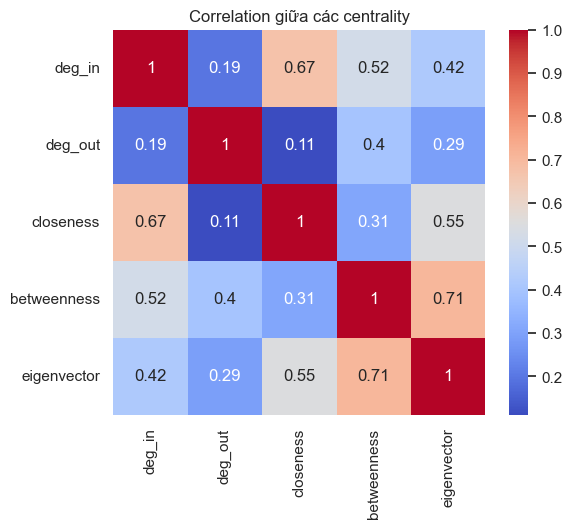

In [16]:
# -----------------------------
# 3. TƯƠNG QUAN CÁC ĐỘ ĐO
# -----------------------------
print("\n=== So sánh tương quan giữa các centrality ===")
centrality_corr = centrality_df[['deg_in','deg_out','closeness','betweenness','eigenvector']].corr()
print(centrality_corr)

plt.figure(figsize=(6,5))
sns.heatmap(centrality_corr, annot=True, cmap='coolwarm')
plt.title("Correlation giữa các centrality")
plt.show()


In [17]:
# -----------------------------
# 4. SẮP XẾP NÚT THEO THUỘC TÍNH / BẬC
# -----------------------------
# Ví dụ sắp xếp theo in-degree và pagerank
centrality_sorted = centrality_df.merge(pagerank_df[['node','pagerank']], on='node')
centrality_sorted = centrality_sorted.sort_values(['deg_in','pagerank'], ascending=False)
centrality_sorted.head(10)


,node,deg_in,deg_out,closeness,betweenness,eigenvector,pagerank
0,NaN,0.002869,0.001913,0.002934,8.468080e-06,0.698537,0.002255
2908,@MinhHoangTran-xk2tr,0.000797,0.000000,0.000797,0.000000e+00,0.000000,0.000641
585,@NghiaChinh-gy6pc,0.000797,0.000080,0.000797,6.352648e-08,0.000003,0.000610
1820,@groupausencon1930,0.000797,0.000080,0.002352,3.430430e-07,0.109542,0.000561
2952,@Diepnhikhucvlog,0.000717,0.000080,0.000717,5.717384e-08,0.000000,0.000637
6241,@Nhatkysinhtontv,0.000638,0.000797,0.000646,2.229780e-06,0.125649,0.000570
4220,@ongtan6354,0.000558,0.000080,0.000558,4.446854e-08,0.000000,0.000512
346,@HuyLeo203,0.000478,0.002311,0.000510,1.880384e-06,0.000326,0.000382
11406,@NgânNguyễn-s1b9m,0.000399,0.000000,0.000531,0.000000e+00,0.000058,0.000512
2817,@Nguyenvu-c7,0.000399,0.000000,0.001364,0.000000e+00,0.012659,0.000457


In [20]:
# -----------------------------
# 5. PHÂN TÍCH TƯƠNG ĐỒNG / TƯƠNG TỰ CẤU TRÚC
# -----------------------------
# Ví dụ tính cosine similarity giữa vector neighbor của node
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Lấy adjacency matrix
A = nx.to_scipy_sparse_array(G_largest, nodelist=list(G_largest.nodes()))
sim_matrix = cosine_similarity(A)

print("\nCosine similarity giữa các node (subgraph nhỏ hoặc top 10 node để xem)")
sim_df = pd.DataFrame(sim_matrix, index=list(G_largest.nodes()), columns=list(G_largest.nodes()))
sim_df.iloc[:10,:10]  # xem ma trận 10x10 đầu


Cosine similarity giữa các node (subgraph nhỏ hoặc top 10 node để xem)


,@ĐạtPhạm-g9u,@DelightMunch,@yamatekudasai5833,@Linhle-yq8hx,@KhanhBang-09-k6y,@lekimloan99,@Bonhai-o4k,@nhankc-qm1us,@longvo9028,@thuonginhngoc4680
@ĐạtPhạm-g9u,1.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
@DelightMunch,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
@yamatekudasai5833,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
@Linhle-yq8hx,0.0,0.0,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0
@KhanhBang-09-k6y,0.0,0.0,0.0,0.0,1.000000,0.316228,0.0,0.0,0.0,0.0
@lekimloan99,0.0,0.0,0.0,0.0,0.316228,1.000000,0.0,0.0,0.0,0.0
@Bonhai-o4k,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0
@nhankc-qm1us,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0
@longvo9028,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0
@thuonginhngoc4680,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0


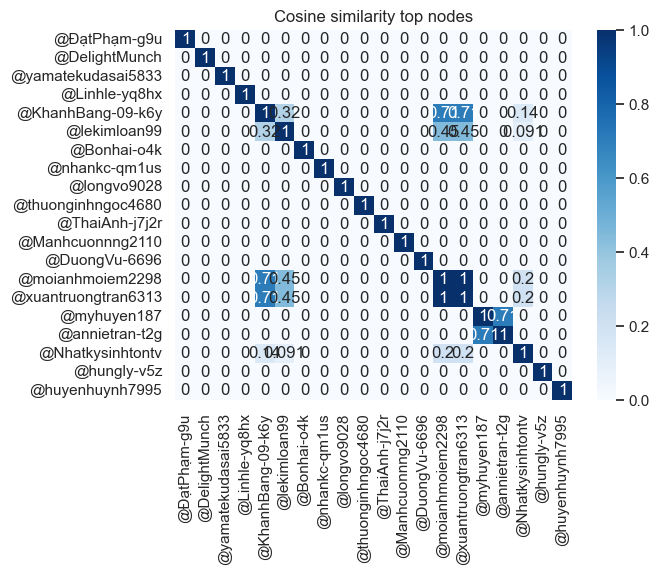

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

top_nodes = sim_df.loc[:, (sim_df>0).any(axis=0)].index[:20]
sns.heatmap(sim_df.loc[top_nodes, top_nodes], annot=True, cmap="Blues")
plt.title("Cosine similarity top nodes")
plt.show()
